In [6]:
library(tidyverse)
library(ggplot2)

# 1)
#read the data and import them in a data.frame
american <- read.table("american_airline_empl.txt", header = T)
delta <- read.table("delta_airline_empl.txt", header = T)
federal <- read.table("federal_express_empl.txt", header = T)
united <- read.table("united_airline_empl.txt", header = T)

# remove the "," as a thousand separator
delta$Full.time <- as.numeric(gsub(",", "", delta$Full.time))
american$Full.time <- as.numeric(gsub(",", "", american$Full.time))
federal$Full.time <- as.numeric(gsub(",", "", federal$Full.time))
united$Full.time <- as.numeric(gsub(",", "", united$Full.time))

american$Part.time <- as.numeric(gsub(",", "", american$Part.time))
delta$Part.time <- as.numeric(gsub(",", "", delta$Part.time))
federal$Part.time <- as.numeric(gsub(",", "", federal$Part.time))
united$Part.time <- as.numeric(gsub(",", "", united$Part.time))

american$Grand.Total <- as.numeric(gsub(",", "", american$Grand.Total))
delta$Grand.Total <- as.numeric(gsub(",", "", delta$Grand.Total))
federal$Grand.Total <- as.numeric(gsub(",", "", federal$Grand.Total))
united$Grand.Total <- as.numeric(gsub(",", "", united$Grand.Total))

head(american)
head(delta)
head(federal)
head(united)

,Month,Year,Full.time,Part.time,Grand.Total
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1990,68137,9039,77176
2,2,1990,68725,9273,77998
3,3,1990,69509,9376,78885
4,4,1990,69713,9326,79039
5,5,1990,70376,9309,79685
6,6,1990,71258,9369,80627


,Month,Year,Full.time,Part.time,Grand.Total
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1990,56340,4226,60566
2,2,1990,56413,4184,60597
3,3,1990,56700,4117,60817
4,4,1990,56630,4112,60742
5,5,1990,56932,4156,61088
6,6,1990,57478,4197,61675


,Month,Year,Full.time,Part.time,Grand.Total
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1990,61305,23580,84885
2,2,1990,61485,23520,85005
3,3,1990,62244,22774,85018
4,4,1990,63511,22917,86428
5,5,1990,63044,23382,86426
6,6,1990,64704,23246,87950


,Month,Year,Full.time,Part.time,Grand.Total
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1990,65664,5457,71121
2,2,1990,65839,5446,71285
3,3,1990,66070,5445,71515
4,4,1990,66779,5518,72297
5,5,1990,67217,5675,72892
6,6,1990,67924,5978,73902


In [7]:
# 2)
# create a new column "company" in each dataframe
american$company <- c(rep("american", nrow(american)))
delta$company <- c(rep("delta", nrow(delta)))
federal$company <- c(rep("federal", nrow(federal)))
united$company <- c(rep("united", nrow(united)))

# merge the dataframes
df <- rbind(american, delta, federal, united)

head(df)

,Month,Year,Full.time,Part.time,Grand.Total,company
,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1990,68137,9039,77176,american
2,2,1990,68725,9273,77998,american
3,3,1990,69509,9376,78885,american
4,4,1990,69713,9326,79039,american
5,5,1990,70376,9309,79685,american
6,6,1990,71258,9369,80627,american


In [8]:
# 3)
# create the date column
df$date <- as.Date(with(df, paste(Year, Month, Month, sep="-")), "%Y-%m-%d")

head(df)

,Month,Year,Full.time,Part.time,Grand.Total,company,date
,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<date>
1,1,1990,68137,9039,77176,american,1990-01-01
2,2,1990,68725,9273,77998,american,1990-02-02
3,3,1990,69509,9376,78885,american,1990-03-03
4,4,1990,69713,9326,79039,american,1990-04-04
5,5,1990,70376,9309,79685,american,1990-05-05
6,6,1990,71258,9369,80627,american,1990-06-06


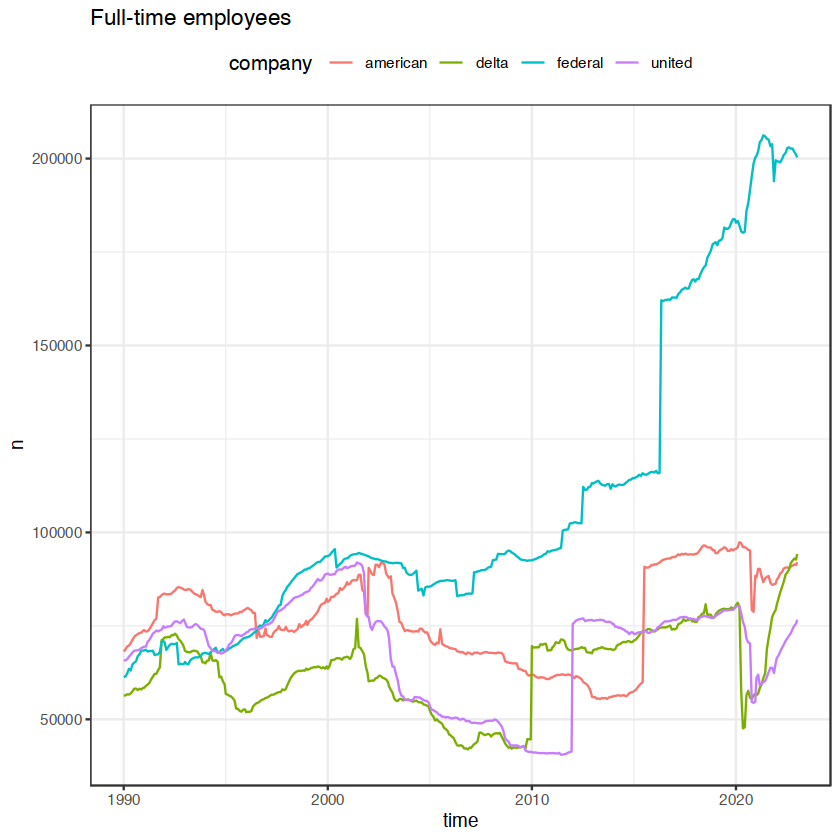

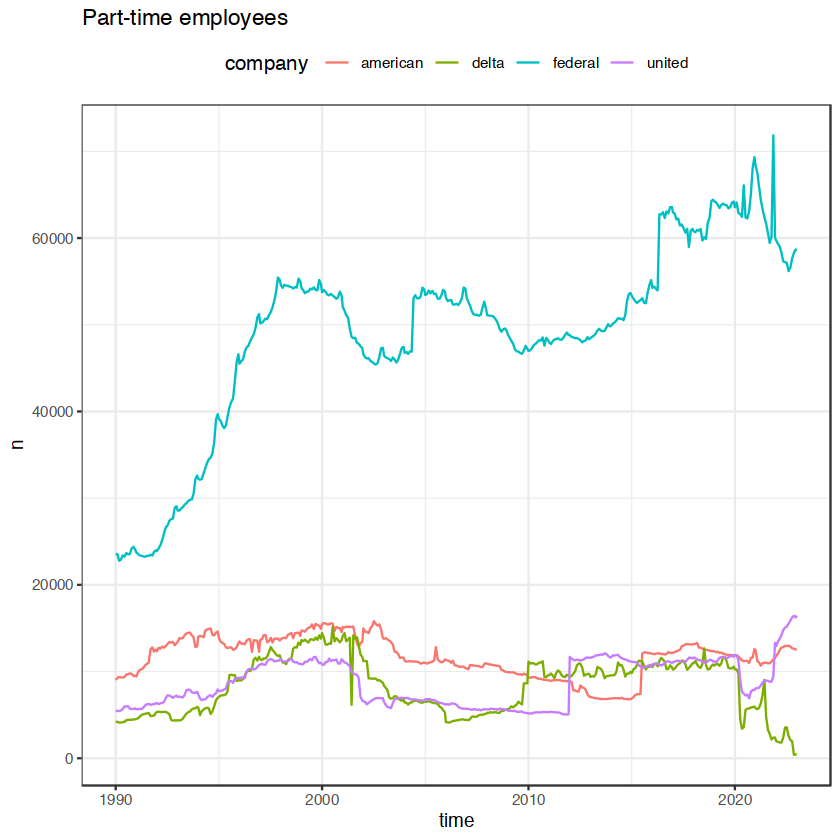

In [9]:
# Create ggplot2 plot 
ggp_ft <- ggplot(df, aes(date, Full.time, col = company)) + geom_line() + theme_bw() + theme(legend.position = "top") + theme(legend.title = element_text(size = 12, face = "bold")) + ggtitle("Full-time employees") + labs(y = "n", x = "time")      
ggp_pt <- ggplot(df, aes(date, Part.time, col = company)) + geom_line() + theme_bw() + theme(legend.position = "top") + theme(legend.title = element_text(size = 12, face = "bold")) + ggtitle("Part-time employees") + labs(y = "n", x = "time")  

ggp_ft 
ggp_pt

In [34]:
# 4)
# create two dataframes with the month and year of minumun/maximum employees for each company
min_empl <- df %>% group_by(company) %>% summarise(month = Month[which.min(Grand.Total)], year = Year[which.min(Grand.Total)], .groups = 'drop')
max_empl <- df %>% group_by(company) %>% summarise(month = Month[which.max(Grand.Total)], year = Year[which.max(Grand.Total)], .groups = 'drop')

min_empl
max_empl

company,month,year
<chr>,<int>,<int>
american,9,2013
delta,11,2006
federal,1,1990
united,6,2011


company,month,year
<chr>,<int>,<int>
american,6,2018
delta,1,2023
federal,3,2021
united,3,2001


In [13]:
print(paste("American airline reached the minimum number of employees on: ", min_empl$month[1], "-", min_empl$year[1]))
print(paste("American airline reached the maximum number of employees on: ", max_empl$month[1], "-", max_empl$year[1]))

print(paste("Delta airline reached the minimum number of employees on: ", min_empl$month[2], "-", min_empl$year[2]))
print(paste("Delta airline reached the maximum number of employees on: ", max_empl$month[2], "-", max_empl$year[2]))

print(paste("Federal airline reached the minimum number of employees on: ", min_empl$month[3], "-", min_empl$year[3]))
print(paste("Federal airline reached the maximum number of employees on: ", max_empl$month[3], "-", max_empl$year[3]))

print(paste("United airline reached the minimum number of employees on: ", min_empl$month[4], "-", min_empl$year[4]))
print(paste("United airline reached the maximum number of employees on: ", max_empl$month[4], "-", max_empl$year[4]))

[1] "American airline reached the minimum number of employees on:  9 - 2013"
[1] "American airline reached the maximum number of employees on:  6 - 2018"
[1] "Delta airline reached the minimum number of employees on:  11 - 2006"
[1] "Delta airline reached the maximum number of employees on:  1 - 2023"
[1] "Federal airline reached the minimum number of employees on:  1 - 1990"
[1] "Federal airline reached the maximum number of employees on:  3 - 2021"
[1] "United airline reached the minimum number of employees on:  6 - 2011"
[1] "United airline reached the maximum number of employees on:  3 - 2001"


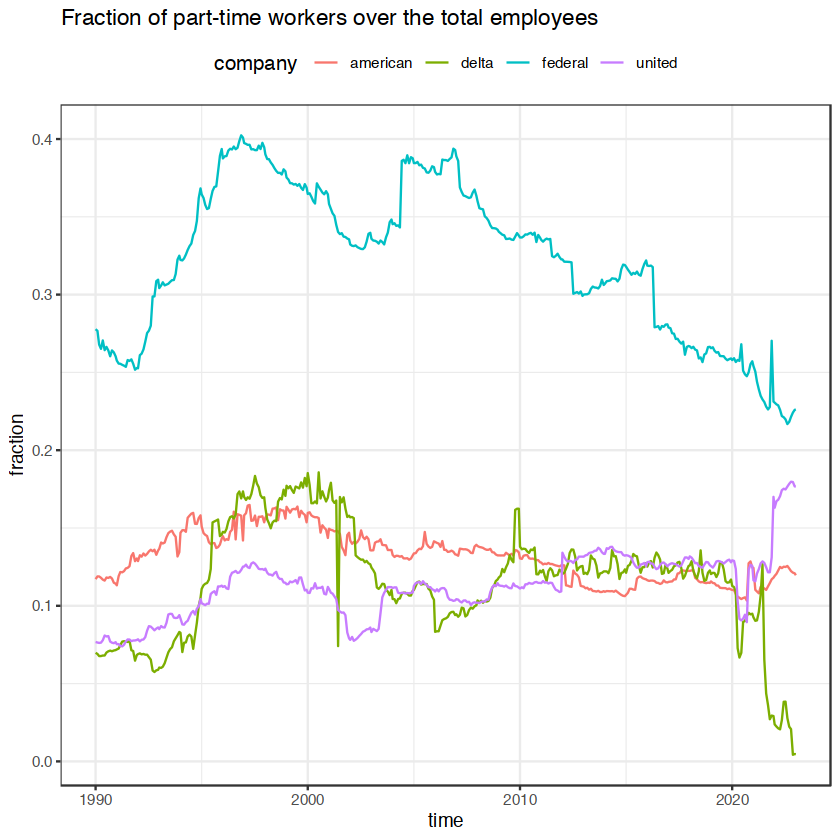

In [39]:
# 5) 
# create a new column "fraction" in the dataframe
df$fraction <- df$Part.time / df$Grand.Total

# create ggplot2 plot 
ggp_frac <- ggplot(df, aes(date, fraction, col = company)) + geom_line() + theme_bw() + theme(legend.position = "top") + theme(legend.title = element_text(size=12, face = "bold")) + ggtitle("Fraction of part-time workers over the total employees") + labs(y = "fraction", x = "time")  

ggp_frac

In [ ]:
# 6)

We can observe that the number of full-time workers is increasing since 2019, and the number of part-time workers is quite constant.
The fraction of part-time employees over the total, in fact is decreasing, except for united airlines.
The impact of Covid-19 can be seen in the trend of the number of full-time workers: in the first period of 2020 the number of employees decreased.